In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os
from degree_days import dds



def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [4]:
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)
static_au = au_df[['area','total_occupants','num_rooms']].copy()
static_au['area'] = static_au['area'].div(4000)
static_au['total_occupants'] = static_au['total_occupants'].div(8)
static_au['num_rooms'] = static_au['num_rooms'].div(8)
static_au = static_au.values

In [5]:
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
static_sd = sd_df[['area','total_occupants','num_rooms']].copy()
static_sd['area'] = static_sd['area'].div(4000)
static_sd['total_occupants'] = static_sd['total_occupants'].div(8)
static_sd['num_rooms'] = static_sd['num_rooms'].div(8)
static_sd = static_sd.values

In [6]:
from sklearn.model_selection import train_test_split, KFold
from common import compute_rmse
from common import compute_rmse_fraction


In [56]:
static_au

array([[ 0.204  ,      nan,      nan],
       [ 0.51175,  0.5    ,  0.75   ],
       [ 0.1515 ,      nan,      nan],
       ..., 
       [ 0.775  ,  0.25   ,  0.5    ],
       [ 0.204  ,      nan,      nan],
       [ 0.35   ,  0.5    ,  0.5    ]])

In [33]:
cost = 'abs'
case = 2
a = 5
b = 3
H_au_5k, A_au_5k, T_au_5k = learn_HAT(case, au_tensor, a, b, num_iter=5000, lr=0.1, dis=True, cost_function=cost, H_known = static_au, T_known=np.ones(12).reshape(-1, 1))
# H_au_8k, A_au_8k, T_au_8k = learn_HAT(case, au_tensor, a, b, num_iter=8000, lr=0.1, dis=True, cost_function=cost, H_known = static_au, T_known=np.ones(12).reshape(-1, 1))



(498.09553722745596, 0.10000000000000001, 0)
(92.926812451088111, 0.10000000000000001, 500)
(67.502407839691088, 0.10000000000000001, 1000)
(59.636467169206682, 0.10000000000000001, 1500)
(58.923463160200129, 0.10000000000000001, 2000)
(58.64763802619391, 0.10000000000000001, 2500)
(58.499881687047107, 0.10000000000000001, 3000)
(58.411506323853835, 0.10000000000000001, 3500)
(58.352585699081466, 0.10000000000000001, 4000)
(58.308963190105551, 0.10000000000000001, 4500)
(498.09553722745596, 0.10000000000000001, 0)
(92.926812451088111, 0.10000000000000001, 500)
(67.502407839691088, 0.10000000000000001, 1000)
(59.636467169206682, 0.10000000000000001, 1500)
(58.923463160200129, 0.10000000000000001, 2000)
(58.64763802619391, 0.10000000000000001, 2500)
(58.499881687047107, 0.10000000000000001, 3000)
(58.411506323853835, 0.10000000000000001, 3500)
(58.352585699081466, 0.10000000000000001, 4000)
(58.308963190105551, 0.10000000000000001, 4500)
(58.275020677754299, 0.10000000000000001, 5000)
(5

In [42]:
H_au_5k_ada, A_au_5k_ada, T_au_5k_ada, Hs, As, Ts, HATs, costs = learn_HAT_adagrad(case, au_tensor, a, b, num_iter=20000, lr=0.1, dis=True, cost_function='l21', H_known = static_au, T_known=np.ones(12).reshape(-1, 1))


497.473941592
142.236885136
97.8258142913
91.040843035
87.3827070862
82.8465728396
79.1189456093
76.4798956869
74.6284178452
73.0456906749
71.573625579
70.1770404749
68.8550453253
67.6059592716
66.4442962466
65.4141827968
64.5032027886
63.7335244211
63.0799214284
62.5313764828
62.0636907295
61.6657654229
61.3458546549
61.065148003
60.8181419013
60.6008252806
60.4076284544
60.2341258192
60.0772043624
59.9358235712
59.8082271051
59.6930171022
59.5889616414
59.4948854908
59.4098425044
59.3330215856
59.2635259949
59.200570459
59.1435151635
59.0917182193


In [35]:
np.set_printoptions(suppress=True)
A_au_5k - A_au_8k

array([[[ 0.06238378,  1.58956553, -0.2444689 ],
        [ 0.57534692,  0.        , -0.13727261],
        [ 0.15347378,  0.59610392,  1.15701969],
        [-0.27497495, -1.90558712,  0.10807225],
        [-0.47568812, -0.1715956 ,  0.34588067]],

       [[ 0.        ,  0.38331187,  0.        ],
        [ 0.00910895,  0.29054352,  0.        ],
        [ 0.        ,  0.15247101,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.0026863 ,  0.        ]],

       [[-0.11869003,  0.09680378,  0.25425297],
        [-0.19728174, -0.10202411,  0.04312404],
        [-0.3426682 , -0.00184014,  0.04878224],
        [ 0.        ,  0.        ,  0.        ],
        [-0.41618154, -0.07716844, -0.0281728 ]],

       [[-0.00267337,  0.00145278,  0.02541988],
        [-0.01583242, -0.04212667,  0.00349386],
        [ 0.10997693,  0.        ,  0.        ],
        [ 0.04247139,  0.        ,  0.        ],
        [-0.00842002, -0.00536299, -0.0159821 ]],

       [[-0.

In [30]:
A_au

array([[[  3.81826636e+00,   1.12297070e-01,   1.07355466e+01],
        [  3.51606811e+00,   0.00000000e+00,   1.67569360e+01],
        [  5.29527372e+00,   1.43839556e+01,   6.03011764e+00],
        [  7.56639835e+00,   1.27869226e+01,   2.52916505e+01],
        [  5.61665041e+00,   2.35367217e+01,   0.00000000e+00]],

       [[  0.00000000e+00,   5.35920850e+00,   0.00000000e+00],
        [  0.00000000e+00,   3.21287526e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   1.89901719e+01,   0.00000000e+00]],

       [[  1.03653843e+00,   9.26884565e-01,   1.50641182e+00],
        [  1.58954724e+00,   1.18769114e+00,   1.58243450e+00],
        [  1.72412222e+00,   4.22003334e-01,   4.84408283e-01],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.94513655e+00,   7.70025144e-01,   9.75529930e-01]],

       [[  5.49948688e-01,   5.537

In [54]:
pred = {}
a = 5
b = 3
n_splits = 10
kf = KFold(n_splits = n_splits)

for method in ['normal','transfer']:
    pred[method] = {}
    for static_fac in ['static', 'None']:
        pred[method][static_fac] = {}
        for random_seed in range(5):
            pred[method][static_fac][random_seed] = {}
            for appliance in APPLIANCES_ORDER:
                pred[method][static_fac][random_seed][appliance] = {f:[] for f in range(10, 110, 40)}
for random_seed in range(5):
    np.random.seed(random_seed)
    for train_percentage in range(10, 110, 40):
        rd = 0
        for train_max, test in kf.split(sd_df):
            print (random_seed, train_percentage, rd)
            rd += 1

            num_train = int((train_percentage*len(train_max)/100)+0.5)
            if train_percentage==100:
                train = train_max
            else:
                train, _ = train_test_split(train_max, train_size = train_percentage/100.0)
            train_ix = sd_df.index[train]
            test_ix = sd_df.index[test]

            num_test = len(test_ix)
            train_test_ix = np.concatenate([test_ix, train_ix])
            df_t, dfc_t = sd_df.ix[train_test_ix], sd_dfc.ix[train_test_ix]
            tensor = get_tensor(df_t, dfc_t)


            # First n
            ################################################################
            # Normal learning in SanDiego
            ################################################################
#             tensor_copy = tensor.copy()
#             tensor_copy[:num_test, 1:, :] = np.NaN
#             H, A, T = learn_HAT(case, tensor_copy, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, H_known = static_sd[np.concatenate([test, train])], T_known = np.ones(12).reshape(-1, 1))
#             HAT = multiply_case(H, A, T, case)
#             for appliance in APPLIANCES_ORDER:
#                 pred['normal']['static'][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))


#             tensor_copy = tensor.copy()
#             tensor_copy[:num_test, 1:, :] = np.NaN
#             H, A, T = learn_HAT(case, tensor_copy, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, T_known = np.ones(12).reshape(-1, 1))
#             HAT = multiply_case(H, A, T, case)
#             for appliance in APPLIANCES_ORDER:
#                 pred['normal']['None'][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))


#             tensor_copy = tensor.copy()
#             tensor_copy[:num_test, 1:, :] = np.NaN
#             H, A, T = learn_HAT(case, tensor_copy, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, H_known = static_sd[np.concatenate([test, train])], A_known = A_au, T_known=np.ones(12).reshape(-1, 1))
#             HAT = multiply_case(H, A, T, case)
#             print HAT[0][0][0]
#             for appliance in APPLIANCES_ORDER:
#                 pred['transfer']['static'][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))

           
            tensor_copy = tensor.copy()
            tensor_copy[:num_test, 1:, :] = np.NaN
            H, A, T = learn_HAT(case, tensor_copy, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, A_known = A_au, T_known=np.ones(12).reshape(-1, 1))
            HAT = multiply_case(H, A, T, case)
            print (HAT[0][0][0])
            for appliance in APPLIANCES_ORDER:
                pred['transfer']['None'][random_seed][appliance][train_percentage].append(pd.DataFrame(HAT[:num_test, appliance_index[appliance], :], index=test_ix))


(0, 10, 0)
186.647480045
(0, 10, 1)
184.352040467
(0, 10, 2)
454.678321907
(0, 10, 3)
170.657228304
(0, 10, 4)
276.450212389
(0, 10, 5)
191.278651579
(0, 10, 6)
159.506246999
(0, 10, 7)
443.413884796
(0, 10, 8)
371.670091247
(0, 10, 9)
377.761149326
(0, 50, 0)
250.971830358
(0, 50, 1)
194.795707301
(0, 50, 2)
340.014553132
(0, 50, 3)
37.3472870838
(0, 50, 4)
33.5069211061
(0, 50, 5)
184.646094346
(0, 50, 6)
211.078119644
(0, 50, 7)
568.516598346
(0, 50, 8)


KeyboardInterrupt: 

In [50]:
out = {}

for method in ['transfer']:
    out[method] = {}
    for static_fac  in ['None']:
        out[method][static_fac] = {}
        for random_seed in range(5):
            out[method][static_fac][random_seed] = {}   
            for appliance in APPLIANCES_ORDER[1:]:
                out[method][static_fac][random_seed][appliance] = {}
                for f in range(10,110,40):
                    s = pd.concat(pred[method][static_fac][random_seed][appliance][f]).ix[sd_df.index]
                    if appliance=="hvac":
                        out[method][static_fac][random_seed][appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
                    else:   
                        out[method][static_fac][random_seed][appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]

/Users/xox/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


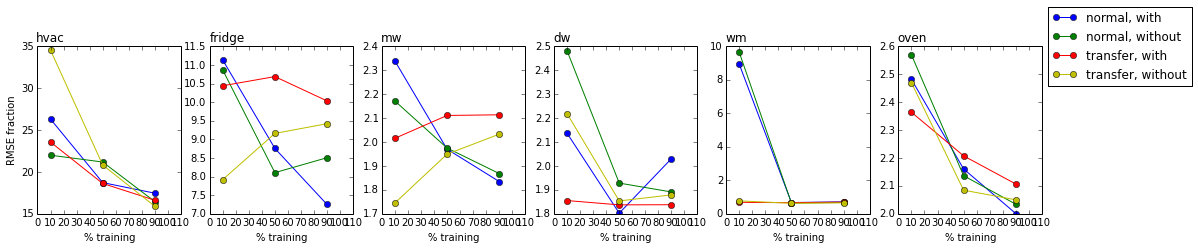

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(50, 80))
ax = axes.flatten()
count = 0

for appliance in APPLIANCES_ORDER[1:]:
#     print appliance
    df1 = mean_out['normal']['static'][appliance]
    df2 = mean_out['normal']['None'][appliance]
    df3 = mean_out['transfer']['static'][appliance]
    df4 = mean_out['transfer']['None'][appliance]
    df = pd.concat([df1, df2, df3, df4], axis = 1)
    pd.DataFrame(df).plot(ax=ax[count],figsize=(18, 3), marker='o', xlim=(0, 110), color=['b', 'g','r', 'y', 'k', 'c'])
    ax[count].legend(loc='best', bbox_to_anchor=(1.0, 0.5))


#     major_ticks = np.arange(0, 101, 20)   

    ax[count].set_xlabel("% training");
    ax[count].locator_params(tight=False, nbins=20, axis='x')
    ax[count].set_title(appliance, loc="left")
    ax[count].legend().set_visible(False)
    count += 1
ax[0].set_ylabel('RMSE fraction')

ax[count-1].legend(["normal, with", 'normal, without', 'transfer, with', 'transfer, without'], loc='center left' , bbox_to_anchor=(1, 1))
# plt.savefig("./analysis/0720/with_without_static_.pdf", bbox_inches="tight", dpi=300, format='pdf')

### Read from files

In [7]:
import pickle

def load_obj(name):
    with open(os.path.expanduser('~/git/' + name + '.pkl'), 'rb') as f:
        return pickle.load(f)

In [43]:
pred = {}
for method in ['normal', 'transfer']:
    pred[method] = {}
    for algo in ['adagrad', 'gd']:
        pred[method][algo] = {}
        for static_fac in ['static', 'None']:
            pred[method][algo][static_fac] = {}
            for random_seed in range(10):
                pred[method][algo][static_fac][random_seed] = load_obj("pred_static_20k_3k/pred_{}_{}_{}_{}".format(method, algo, static_fac, random_seed))

In [44]:
out = {}

for method in ['normal', 'transfer']:
    out[method] = {}
    for algo in ['adagrad', 'gd']:
        out[method][algo] = {}
        for static_fac  in ['static', 'None']:
            out[method][algo][static_fac] = {}
            for random_seed in range(5):
                out[method][algo][static_fac][random_seed] = {}   
                for appliance in APPLIANCES_ORDER[1:]:
                    print (method, algo, static_fac, random_seed, appliance)
                    out[method][algo][static_fac][random_seed][appliance] = {}
                    for f in range(10,110,10):
                        s = pd.concat(pred[method][algo][static_fac][random_seed][appliance][f]).ix[sd_df.index]
                        if appliance=="hvac":
                            out[method][algo][static_fac][random_seed][appliance][f] = compute_rmse_fraction(appliance,s[range(4, 10)],'SanDiego')[2]
                        else:   
                            out[method][algo][static_fac][random_seed][appliance][f] = compute_rmse_fraction(appliance, s,'SanDiego')[2]


('normal', 'adagrad', 'static', 0, 'hvac')


/Users/xox/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


('normal', 'adagrad', 'static', 0, 'fridge')
('normal', 'adagrad', 'static', 0, 'mw')
('normal', 'adagrad', 'static', 0, 'dw')
('normal', 'adagrad', 'static', 0, 'wm')
('normal', 'adagrad', 'static', 0, 'oven')
('normal', 'adagrad', 'static', 1, 'hvac')
('normal', 'adagrad', 'static', 1, 'fridge')
('normal', 'adagrad', 'static', 1, 'mw')
('normal', 'adagrad', 'static', 1, 'dw')
('normal', 'adagrad', 'static', 1, 'wm')
('normal', 'adagrad', 'static', 1, 'oven')
('normal', 'adagrad', 'static', 2, 'hvac')
('normal', 'adagrad', 'static', 2, 'fridge')
('normal', 'adagrad', 'static', 2, 'mw')
('normal', 'adagrad', 'static', 2, 'dw')
('normal', 'adagrad', 'static', 2, 'wm')
('normal', 'adagrad', 'static', 2, 'oven')
('normal', 'adagrad', 'static', 3, 'hvac')
('normal', 'adagrad', 'static', 3, 'fridge')
('normal', 'adagrad', 'static', 3, 'mw')
('normal', 'adagrad', 'static', 3, 'dw')
('normal', 'adagrad', 'static', 3, 'wm')
('normal', 'adagrad', 'static', 3, 'oven')
('normal', 'adagrad', 'stat

('transfer', 'gd', 'static', 4, 'fridge')
('transfer', 'gd', 'static', 4, 'mw')
('transfer', 'gd', 'static', 4, 'dw')
('transfer', 'gd', 'static', 4, 'wm')
('transfer', 'gd', 'static', 4, 'oven')
('transfer', 'gd', 'None', 0, 'hvac')
('transfer', 'gd', 'None', 0, 'fridge')
('transfer', 'gd', 'None', 0, 'mw')
('transfer', 'gd', 'None', 0, 'dw')
('transfer', 'gd', 'None', 0, 'wm')
('transfer', 'gd', 'None', 0, 'oven')
('transfer', 'gd', 'None', 1, 'hvac')
('transfer', 'gd', 'None', 1, 'fridge')
('transfer', 'gd', 'None', 1, 'mw')
('transfer', 'gd', 'None', 1, 'dw')
('transfer', 'gd', 'None', 1, 'wm')
('transfer', 'gd', 'None', 1, 'oven')
('transfer', 'gd', 'None', 2, 'hvac')
('transfer', 'gd', 'None', 2, 'fridge')
('transfer', 'gd', 'None', 2, 'mw')
('transfer', 'gd', 'None', 2, 'dw')
('transfer', 'gd', 'None', 2, 'wm')
('transfer', 'gd', 'None', 2, 'oven')
('transfer', 'gd', 'None', 3, 'hvac')
('transfer', 'gd', 'None', 3, 'fridge')
('transfer', 'gd', 'None', 3, 'mw')
('transfer', 'gd',

In [45]:
mean_out = {}
for method in ['normal', 'transfer']:
    mean_out[method] = {}
    for algo in ['adagrad', 'gd']:
        mean_out[method][algo] = {}
        for static_fac  in ['static', 'None']:
            mean_out[method][algo][static_fac] = pd.Panel(out[method][algo][static_fac]).mean(axis=0)

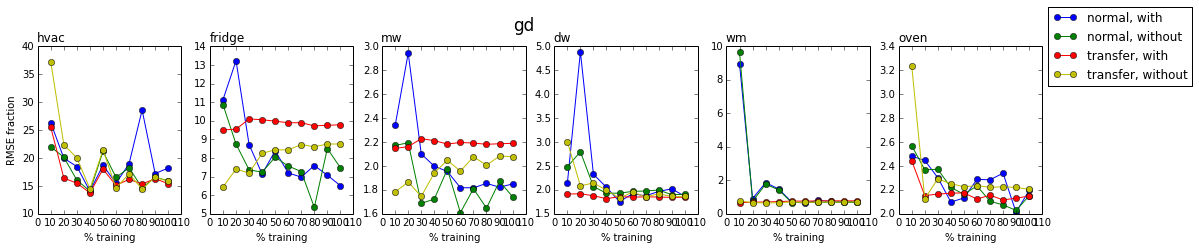

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(50, 80))
ax = axes.flatten()
count = 0
algo = 'gd'

for appliance in APPLIANCES_ORDER[1:]:
#     print appliance
    df1 = mean_out['normal'][algo]['static'][appliance]
    df2 = mean_out['normal'][algo]['None'][appliance]
    df3 = mean_out['transfer'][algo]['static'][appliance]
    df4 = mean_out['transfer'][algo]['None'][appliance]
    df = pd.concat([df1, df2, df3, df4], axis = 1)
    pd.DataFrame(df).plot(ax=ax[count],figsize=(18, 3), marker='o', xlim=(0, 110), color=['b', 'g','r', 'y', 'k', 'c'])
    ax[count].legend(loc='best', bbox_to_anchor=(1.0, 0.5))


#     major_ticks = np.arange(0, 101, 20)   

    ax[count].set_xlabel("% training");
    ax[count].locator_params(tight=False, nbins=20, axis='x')
    ax[count].set_title(appliance, loc="left")
    ax[count].legend().set_visible(False)
    count += 1
ax[0].set_ylabel('RMSE fraction')
plt.suptitle(algo, fontsize=17,y=1.04)


ax[count-1].legend(["normal, with", 'normal, without', 'transfer, with', 'transfer, without'], loc='center left' , bbox_to_anchor=(1, 1))
plt.savefig("./analysis/0720/with_without_static_gd_20k_3k.pdf", bbox_inches="tight", dpi=300, format='pdf')

In [64]:
cost='abs'
H_no, A_no, T_no = learn_HAT(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, A_known = A_au, T_known=np.ones(12).reshape(-1, 1))
H_static, A_static, T_static = learn_HAT(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, H_known = static_sd, A_known = A_au, T_known=np.ones(12).reshape(-1, 1))

In [164]:
cost='abs'
H_no_n, A_no_n, T_no_n = learn_HAT(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, T_known=np.ones(12).reshape(-1, 1))
H_static_n, A_static_n, T_static_n = learn_HAT(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, H_known = static_sd, T_known=np.ones(12).reshape(-1, 1))

In [135]:
cost='l21'
H_no_ada, A_no_ada, T_no_ada, H_nos, A_nos, T_nos, HAT_nos, costs_nos = learn_HAT_adagrad(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, A_known = A_au, T_known=np.ones(12).reshape(-1, 1))
H_static_ada, A_static_ada, T_static_ada, H_ss, A_ss, T_ss, HAT_ss, costs_ss = learn_HAT_adagrad(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, H_known = static_sd, A_known = A_au, T_known=np.ones(12).reshape(-1, 1))

In [165]:
cost='l21'
H_no_ada_n, A_no_ada_n, T_no_ada_n, H_nos, A_nos, T_nos, HAT_nos, costs_nos = learn_HAT_adagrad(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, T_known=np.ones(12).reshape(-1, 1))
H_static_ada_n, A_static_ada_n, T_static_ada_n, H_ss, A_ss, T_ss, HAT_ss, costs_ss = learn_HAT_adagrad(case, sd_tensor, a, b, num_iter=3000, lr=0.1, dis=False, cost_function=cost, H_known = static_sd, T_known=np.ones(12).reshape(-1, 1))

In [169]:
np.set_printoptions(suppress=True)
H_static_n

array([[ 0.48934724,  0.77903258,  0.53422687,  1.74973796,  1.63114822],
       [ 0.38875   ,  2.19234238,  0.01799848,  1.27983051,  2.13073665],
       [ 0.        ,  3.71092677,  4.86902497,  2.33468122,  3.686147  ],
       [ 0.39375   ,  0.52113314,  1.21265145,  3.3854108 ,  5.66151675],
       [ 0.5125    ,  6.95270111,  0.        ,  0.24673475,  4.12488068],
       [ 0.38875   ,  0.25      ,  0.5       ,  1.80794146,  5.15109383],
       [ 0.77204417,  1.34202085,  0.        ,  1.61300598,  1.07734989],
       [ 0.545     ,  1.97108732,  0.81354485,  2.79925075,  3.17538845],
       [ 0.3475    ,  0.25      ,  0.5       ,  1.17747892,  4.86842284],
       [ 2.10880949,  1.11264264,  0.35648566,  2.14280881,  3.75538057],
       [ 0.366     ,  2.74693448,  0.62517626,  0.66934575,  1.14004895],
       [ 0.28      ,  0.82277194,  0.0569019 ,  1.79642791,  0.        ],
       [ 0.73059325,  0.59506865,  0.        ,  0.85449053,  0.59624118],
       [ 0.        ,  0.70627086,  4.4

In [167]:
H_no_ada_n

array([[  1.31005520e+00,   2.97735704e+00,   1.16496047e+00,
          2.16147204e+00,   2.59728663e+00],
       [  2.99634600e+00,   8.30139793e-01,   1.31155797e+00,
          3.28714731e+00,   3.82712388e+00],
       [  5.72554080e+00,   3.01968964e+00,   6.48540293e+00,
          6.87493376e+00,   4.28671575e+00],
       [  4.89609199e+00,   5.53938505e+00,   4.64676656e+00,
          4.77525678e+00,   5.08492202e+00],
       [  5.01110474e+00,   1.00000000e-08,   3.46008311e+00,
          8.74112568e+00,   5.42888460e+00],
       [  5.52348184e+00,   2.30070410e+00,   2.55387010e+00,
          4.58052530e+00,   4.21022727e+00],
       [  1.07838731e+00,   1.58913141e+00,   1.00000000e-08,
          2.09673465e+00,   4.12413824e+00],
       [  3.77633258e+00,   4.08905153e+00,   2.75163618e+00,
          4.10778518e+00,   4.12767178e+00],
       [  3.60230648e+00,   1.50723870e+00,   4.23489197e+00,
          3.86790927e+00,   3.57809560e+00],
       [  3.79500293e+00,   4.9433151

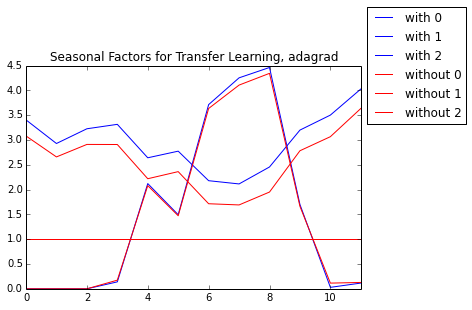

In [158]:
pd.DataFrame(np.c_[T_static_ada, T_no_ada]).plot(color=['b', 'b','b', 'r', 'r', 'r'])
plt.title('Seasonal Factors for Transfer Learning, adagrad')
plt.legend(["with 0", 'with 1', 'with 2', 'without 0', 'without 1', 'without 2'], loc='center left' , bbox_to_anchor=(1, 1))
plt.savefig("./analysis/0720/seasonal_factors_adagrad.pdf", bbox_inches="tight", dpi=300, format='pdf')

In [151]:
static_sd

array([[     nan,      nan,      nan],
       [ 0.38875,      nan,      nan],
       [     nan,      nan,      nan],
       [ 0.39375,      nan,      nan],
       [ 0.5125 ,      nan,      nan],
       [ 0.38875,  0.25   ,  0.5    ],
       [     nan,      nan,      nan],
       [ 0.545  ,      nan,      nan],
       [ 0.3475 ,  0.25   ,  0.5    ],
       [     nan,      nan,      nan],
       [ 0.366  ,      nan,      nan],
       [ 0.28   ,      nan,      nan],
       [     nan,      nan,      nan],
       [     nan,      nan,      nan],
       [     nan,      nan,      nan],
       [ 0.27175,      nan,      nan],
       [ 0.395  ,      nan,      nan],
       [ 0.38675,      nan,      nan],
       [ 0.1675 ,      nan,  0.125  ],
       [ 0.369  ,  0.125  ,  0.375  ],
       [     nan,      nan,      nan],
       [     nan,      nan,      nan],
       [     nan,      nan,      nan],
       [ 0.5125 ,      nan,      nan],
       [ 0.38675,      nan,      nan],
       [ 0.35   ,  0.25  

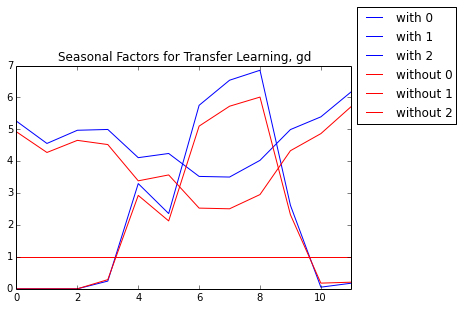

In [159]:
pd.DataFrame(np.c_[T_static, T_no]).plot(color=['b', 'b','b', 'r', 'r', 'r'])
plt.title('Seasonal Factors for Transfer Learning, gd')
plt.legend(["with 0", 'with 1', 'with 2', 'without 0', 'without 1', 'without 2'], loc='center left' , bbox_to_anchor=(1, 1))

plt.savefig("./analysis/0720/seasonal_factors_gd.pdf", bbox_inches="tight", dpi=300, format='pdf')

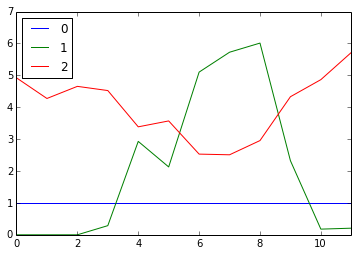

In [70]:
pd.DataFrame(T_no).plot()

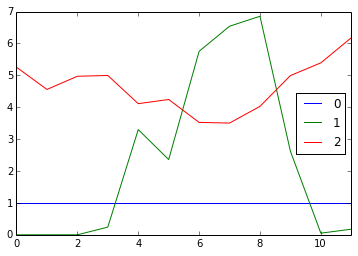

In [71]:
pd.DataFrame(T_static).plot()

In [88]:
pred_no = multiply_case(H_no, A_no, T_no, 2)
pred_static = multiply_case(H_static, A_static, T_static, 2)

(array([ 2727.,   205.,   128.,    84.,    58.,    22.,    23.,    11.,
           10.,     8.]),
 array([    0.        ,   124.57865314,   249.15730628,   373.73595942,
          498.31461256,   622.8932657 ,   747.47191884,   872.05057197,
          996.62922511,  1121.20787825,  1245.78653139]),
 <a list of 10 Patch objects>)

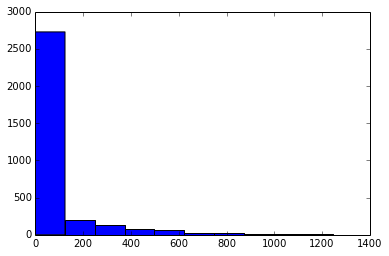

In [97]:
plt.hist(pred_no.reshape(1, -1).T)

In [118]:
.shape

(1, 3276)

In [148]:
k = (pred_no.reshape(1,-1) - sd_df.ix[:, 'hvac_1':'oven_12'].as_matrix().reshape(1, -1))
k.reshape(-1, 6)

array([[          nan,           nan,           nan,  242.53117356,
         291.28433587,  245.87099047],
       [ 270.04169561,  293.95220453,           nan,           nan,
                  nan,           nan],
       [          nan,           nan,   -9.36161325,           nan,
                  nan,   48.80208902],
       ..., 
       [          nan,   -3.95812193,   -2.10601865,   -2.04370625,
          -2.57105971,   -3.55920916],
       [          nan,           nan,           nan,           nan,
                  nan,           nan],
       [          nan,           nan,           nan,           nan,
                  nan,           nan]])

In [149]:
k = k[~np.isnan(k)]


(array([ 793.,   43.,   75.,   69.,   42.,   30.,   26.,   22.,   15.,    6.]),
 array([ -45.65746251,   32.73638868,  111.13023986,  189.52409105,
         267.91794223,  346.31179342,  424.7056446 ,  503.09949579,
         581.49334697,  659.88719816,  738.28104934]),
 <a list of 10 Patch objects>)

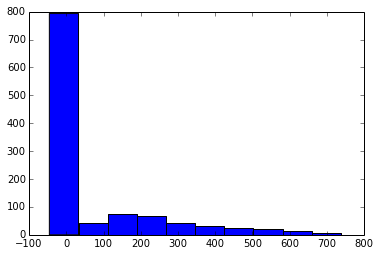

In [150]:
plt.hist(k.reshape(1, -1).T)

In [96]:
plt.show()

(array([   1.,    0.,    2.,    0.,    9.,   27.,  103.,   38.,   11.,    4.]),
 array([-4.41136151, -3.77109442, -3.13082733, -2.49056023, -1.85029314,
        -1.21002605, -0.56975896,  0.07050813,  0.71077523,  1.35104232,
         1.99130941]),
 <a list of 10 Patch objects>)

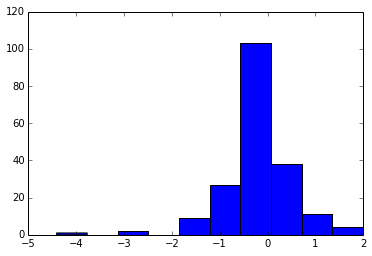

In [163]:
plt.hist((H_static - H_no).reshape(1, -1).T)